In [1]:
#import the tools we will use: pandas, numpy as pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from numpy import *

In [2]:
#load the data
data1 = pd.read_csv("C://Users/Thinkpad/Desktop/machine learning/week3/machine-learning-ex2/ex2/ex2data1.txt",header=None)
data2 = pd.read_csv("C://Users/Thinkpad/Desktop/machine learning/week3/machine-learning-ex2/ex2/ex2data2.txt",header=None)

## 1.1 Visualizing the data

In [3]:
data1.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X = data1.iloc[:, [0, 1]]
y = data1.iloc[:, 2]
X_mat = mat(data1.iloc[:, [0, 1]]).T
y_mat = mat(data1.iloc[:, 2]).T

<function matplotlib.pyplot.show(*args, **kw)>

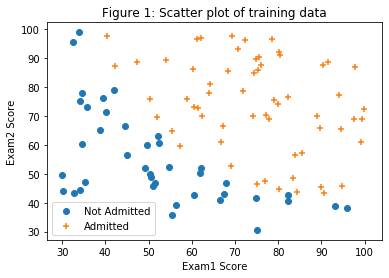

In [5]:
plt.scatter(data1[y == 0].iloc[:, [0, 1]][0],data1[y == 0].iloc[:, [0, 1]][1],marker = "o", label = "Not Admitted")
plt.scatter(data1[y == 1].iloc[:, [0, 1]][0],data1[y == 1].iloc[:, [0, 1]][1],marker = "+", label = "Admitted")
plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 Score")
plt.title("Figure 1: Scatter plot of training data")
plt.legend(loc='lower left')
plt.show

## 1.2 Implementation

In [6]:
#define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
#define the cost function
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    return np.sum(np.multiply(-y, np.log(sigmoid(X * theta.T))) - np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))) / (len(X))

In [10]:
data1.insert(0, 'Ones', 1)

cols = data1.shape[1]
X = data1.iloc[:,0:cols-1]
y = data1.iloc[:,cols-1:cols]
theta = np.zeros(3)

X = np.array(X.values)
y = np.array(y.values)

In [11]:
cost(theta, X, y)

0.6931471805599453

In [12]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [13]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])